In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:08<00:00, 24.2MB/s]
100% 163M/163M [00:08<00:00, 20.7MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2021.jpg', 'with_mask_3111.jpg', 'with_mask_1236.jpg', 'with_mask_3088.jpg', 'with_mask_1657.jpg']
['with_mask_689.jpg', 'with_mask_2017.jpg', 'with_mask_3505.jpg', 'with_mask_356.jpg', 'with_mask_2520.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_151.jpg', 'without_mask_1129.jpg', 'without_mask_2143.jpg', 'without_mask_585.jpg', 'without_mask_1170.jpg']
['without_mask_2523.jpg', 'without_mask_1941.jpg', 'without_mask_55.jpg', 'without_mask_2805.jpg', 'without_mask_3247.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


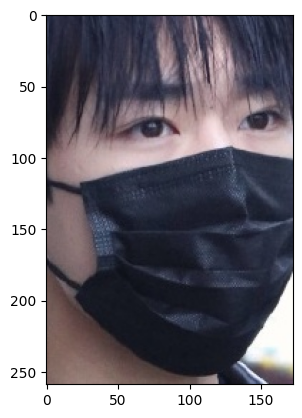

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1540.jpg')
imgplot = plt.imshow(img)
plt.show()

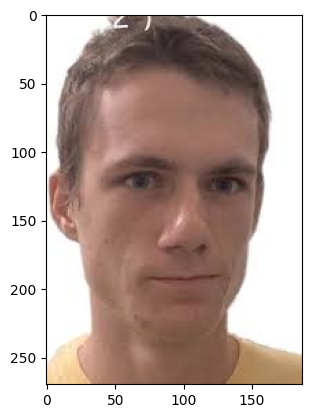

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2108.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[219, 216, 223],
        [218, 215, 222],
        [217, 214, 221],
        ...,
        [214, 212, 215],
        [214, 212, 215],
        [214, 212, 215]],

       [[218, 215, 222],
        [217, 214, 221],
        [216, 213, 220],
        ...,
        [213, 211, 214],
        [213, 211, 214],
        [213, 211, 214]],

       [[219, 216, 223],
        [218, 215, 222],
        [217, 214, 221],
        ...,
        [213, 211, 214],
        [213, 211, 214],
        [213, 211, 214]]], dtype=uint8)
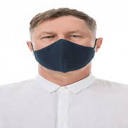

In [ ]:
data[200]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[228, 236, 239],
        [227, 235, 237],
        [223, 231, 234],
        ...,
        [238, 240, 239],
        [240, 242, 241],
        [240, 242, 241]],

       [[228, 236, 239],
        [227, 235, 237],
        [223, 231, 234],
        ...,
        [235, 237, 236],
        [236, 238, 237],
        [236, 238, 237]],

       [[228, 236, 239],
        [227, 235, 238],
        [225, 233, 236],
        ...,
        [231, 233, 232],
        [230, 232, 231],
        [230, 232, 231]],

       ...,

       [[ 45,  29,  34],
        [ 42,  29,  34],
        [ 38,  26,  30],
        ...,
        [ 48,  35,  42],
        [ 35,  23,  30],
        [ 29,  17,  24]],

       [[ 41,  26,  31],
        [ 40,  26,  31],
        [ 38,  25,  29],
        ...,
        [ 67,  54,  61],
        [ 45,  32,  39],
        [ 34,  21,  28]],

       [[ 40,  25,  30],
        [ 39,  25,  30],
        [ 38,  25,  29],
        ...,
        [ 76,  63,  70],
        [ 50,  37,  44],
        [ 37,  23,  31]]], dtype=uint8)
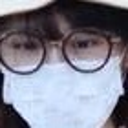

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.89411765, 0.9254902 , 0.9372549 ],
        [0.89019608, 0.92156863, 0.92941176],
        [0.8745098 , 0.90588235, 0.91764706],
        ...,
        [0.93333333, 0.94117647, 0.9372549 ],
        [0.94117647, 0.94901961, 0.94509804],
        [0.94117647, 0.94901961, 0.94509804]],

       [[0.89411765, 0.9254902 , 0.9372549 ],
        [0.89019608, 0.92156863, 0.92941176],
        [0.8745098 , 0.90588235, 0.91764706],
        ...,
        [0.92156863, 0.92941176, 0.9254902 ],
        [0.9254902 , 0.93333333, 0.92941176],
        [0.9254902 , 0.93333333, 0.92941176]],

       [[0.89411765, 0.9254902 , 0.9372549 ],
        [0.89019608, 0.92156863, 0.93333333],
        [0.88235294, 0.91372549, 0.9254902 ],
        ...,
        [0.90588235, 0.91372549, 0.90980392],
        [0.90196078, 0.90980392, 0.90588235],
        [0.90196078, 0.90980392, 0.90588235]],

       ...,

       [[0.17647059, 0.11372549, 0.13333333],
        [0.16470588, 0.11372549, 0.13333333],
        [0.14901961, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - acc: 0.6632 - loss: 0.6492 - val_acc: 0.8678 - val_loss: 0.2973
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8790 - loss: 0.2986 - val_acc: 0.8760 - val_loss: 0.2600
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9129 - loss: 0.2369 - val_acc: 0.9107 - val_loss: 0.2264
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9193 - loss: 0.1956 - val_acc: 0.9289 - val_loss: 0.2326
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9385 - loss: 0.1508 - val_acc: 0.9355 - val_loss: 0.2008


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9063 - loss: 0.2164
Test Accuracy = 0.9166114926338196


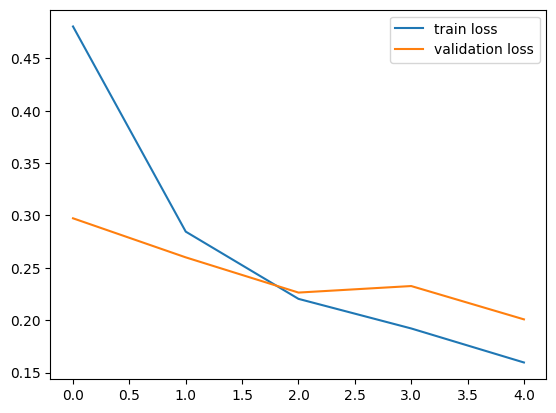

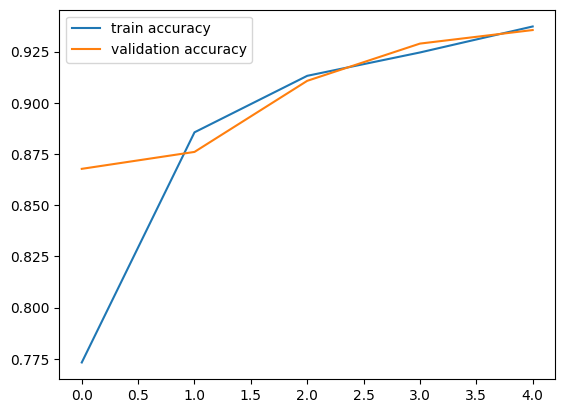

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/test.png


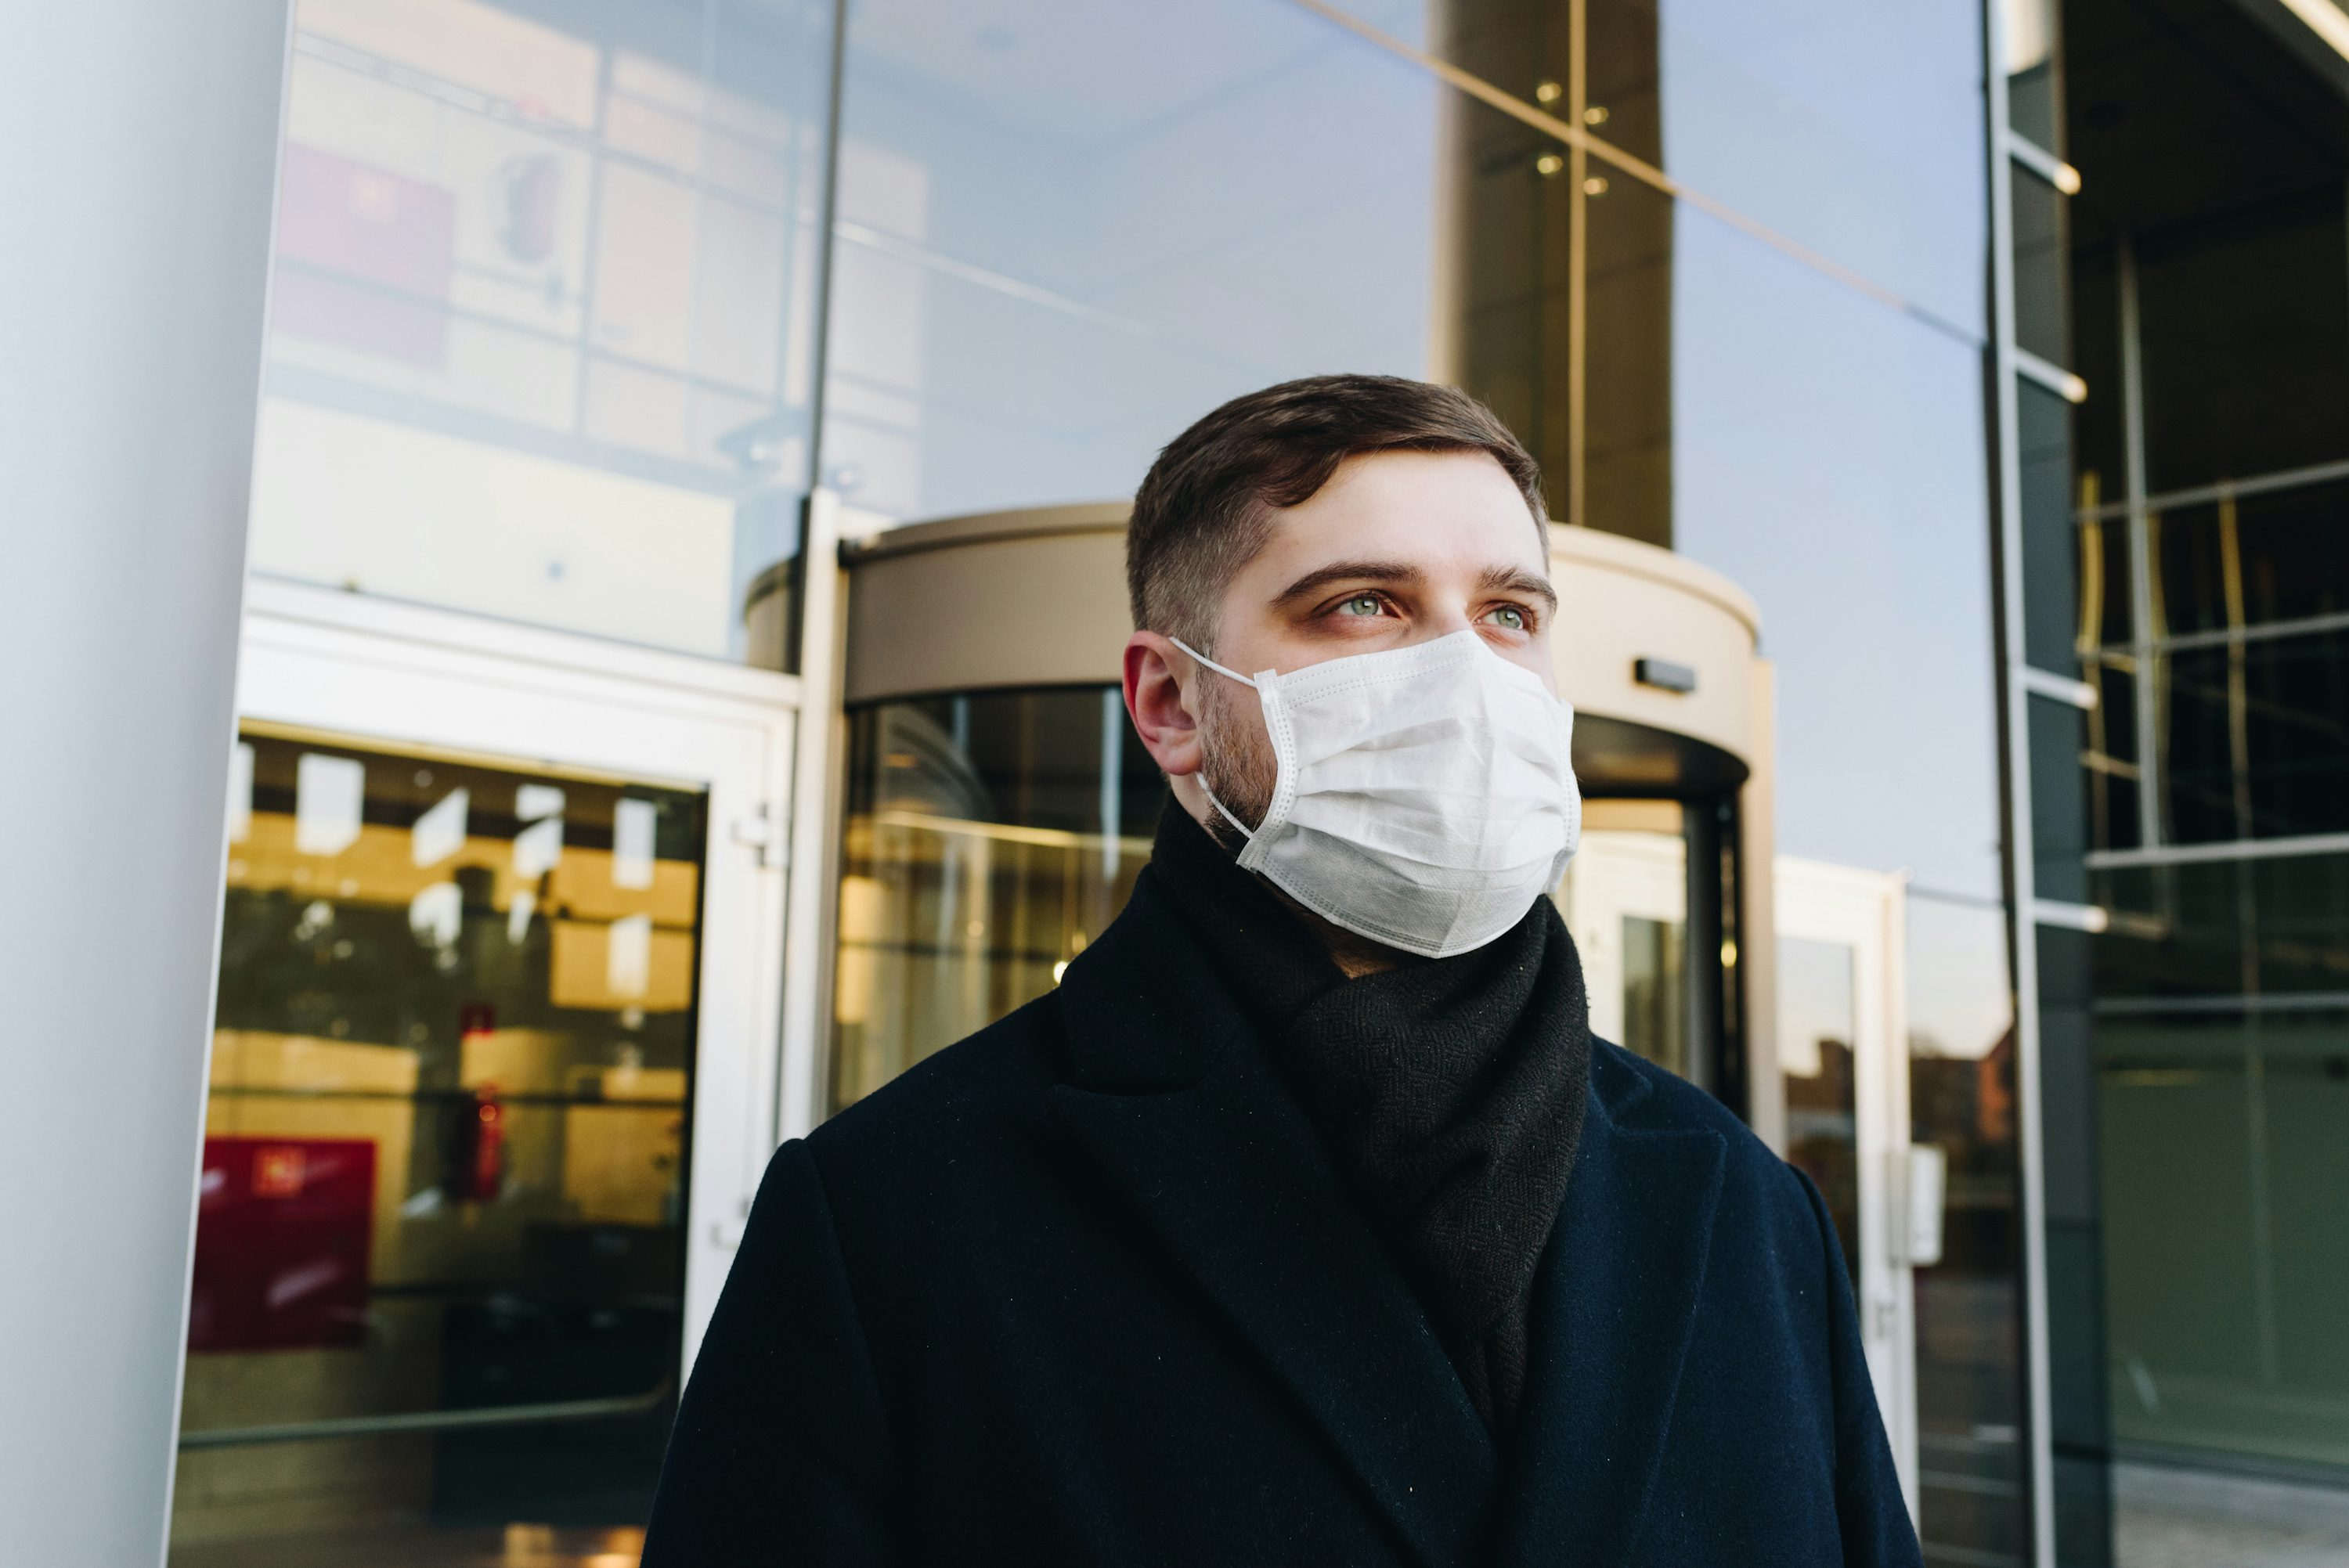

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.00526351 0.99750406]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')